## Initial Setup

In [1]:
%load_ext autoreload
%autoreload

## This expands a notebook to full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>div.output_area{max-height:10000px;overflow:scroll;}</style>"""))

## Show Python Version
import sys
print("Python: {0}".format(sys.version))

## Show Current Time
import datetime as dt
start = dt.datetime.now()
print("Notebook Last Run Initiated: "+str(start))

Python: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Notebook Last Run Initiated: 2019-12-19 12:13:03.880273


## Import Useful Functions 

In [2]:
from pandas import DataFrame, Series, read_csv, to_numeric
from itertools import combinations
import networkx as nx
from pyvis import network as net

## Load User Friendly Functions

In [3]:
from ioUtilities import getFile, saveFile

# Network 101: Pokemon

In [4]:
## FYI, there are 18 Pokemon types each with weakness against at least one other type
weakAgainst = {}
weakAgainst["Ghost"] = ["Ghost", "Dark"]
weakAgainst["Dark"]  = ["Fighting", "Bug", "Fairy"]
weakAgainst["Fairy"] = ["Poison", "Steel"]
weakAgainst["Steel"] = ["Fire", "Fighting", "Ground"]
weakAgainst["Fire"]  = ["Water", "Ground", "Rock"]
weakAgainst["Rock"]  = ["Water", "Grass", "Fighting", "Ground", "Steel"]
weakAgainst["Grass"] = ["Fire", "Ice", "Poison", "Flying", "Bug"]
weakAgainst["Bug"]   = ["Fire", "Flying", "Rock"]
weakAgainst["Flying"] = ["Electric", "Ice", "Rock"]
weakAgainst["Electric"] = ["Ground"]
weakAgainst["Ground"] = ["Water", "Grass", "Ice"]
weakAgainst["Ice"]   = ["Fire", "Fighting", "Rock", "Steel"]
weakAgainst["Dragon"] = ["Ice", "Dragon", "Fairy"]
weakAgainst["Fairy"]  = ["Poison", "Steel"]
weakAgainst["Poison"] = ["Ground", "Psychic"]
weakAgainst["Psychic"] = ["Bug", "Ghost", "Dark"]
weakAgainst["Normal"] = ["Fighting"]
weakAgainst["Fighting"] = ["Flying", "Psychic", "Fairy"]
weakAgainst["Water"] = ["Electric", "Grass"]

color_map = {"Bug": "A8B820", "Dark": "705848", "Dragon": "7038F8", "Electric": "F8D030", "Fairy": "EE99AC",
             "Fighting": "C03028", "Fire": 'FF0000', "Flying": "A890F0", "Ghost": "705898", "Grass": "78C850",
             "Ground": 'B5651D', "Ice": "98D8D8", "Normal": "A8A878", "Poison": "A040A0", "Psychic": "F85888",
             "Rock": "B8A038", "Steel": "B8B8D0", "Water": "6890F0"}

## Create a Directed (Di) Graph

In [5]:
G = nx.DiGraph()
#G = nx.MultiDiGraph()

## Build Network By Adding Edges (i.e., Water is weak against Electric and Grass types)

In [6]:
for ptype,vals in weakAgainst.items():
    for val in vals:
        G.add_edge(val, ptype, color="#{0}".format(color_map[val]))

## Draw Network

In [7]:
labels = list(G.nodes())
node_colors = ["#{0}".format(color_map[node]) for node in G.nodes()]
nodes = G.nodes(True)
node_labels = {n: n for n, attrs in nodes}

In [8]:
edges = G.edges()
edge_colors = [G[u][v]['color'] for u,v in edges]

In [11]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 12)

Drawing the self-loops is a pain so we're skipping that part


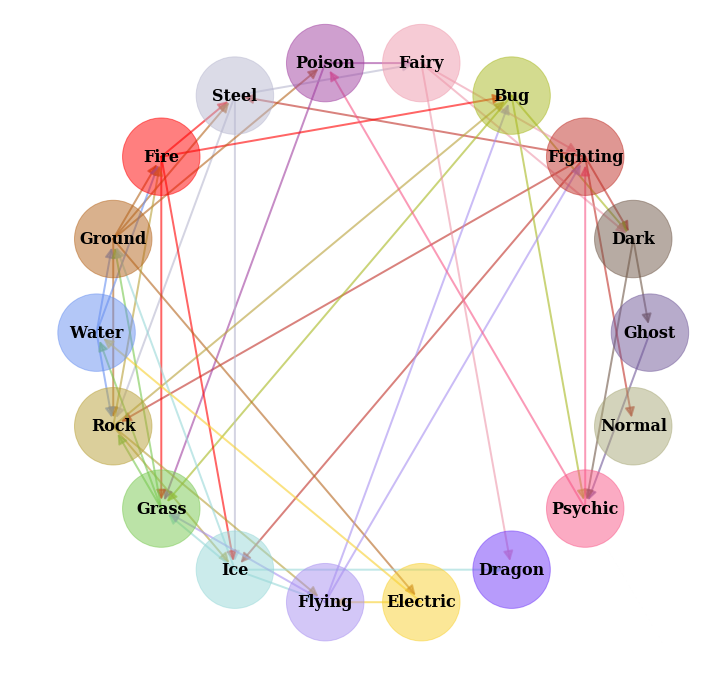

In [15]:
print("Drawing the self-loops is a pain so we're skipping that part")
pos = nx.circular_layout(G)
#pos = nx.spring_layout(G)
#pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=6000, node_shape='o', node_color=node_colors, alpha=0.5)
nx.draw_networkx_edges(G, pos, style='dotted', arrowsize=20, edge_color=edge_colors, width=2, alpha=0.6)
nx.draw_networkx_labels(G, pos, node_labels, alpha=1, font_size=16, font_weight='bold', font_family='serif')
plt.axis('off')
plt.savefig("types.pdf", dpi=150) ## Plot is saved as a PDF

## Load IMDB Actor/Movie Data

In [16]:
## getFile will load the pickle file (ext-->.p)
networkDF = getFile("data.p")

In [18]:
## Show the first 5 rows of the dataframe
networkDF

,Title,Actor,Year,Award
3,Valdemar Sejr,Peter Malberg,1910,NaN
4,Valdemar Sejr,Ellen Gottschalch,1910,NaN
7,Ekspeditricen,Clara Pontoppidan,1911,NaN
8,Ekspeditricen,Thorkild Roose,1911,NaN
11,Par habitude,Maurice Chevalier,1911,NaN
13,Passion,Pola Negri,1919,NaN
14,Passion,Emil Jannings,1919,NaN
19,Caprice,Mary Pickford,1913,NaN
20,Caprice,Owen Moore,1913,NaN
21,The Count of Monte Cristo,Nance O'Neil,1913,NaN


## Add a few useful columns to the data frame

In [19]:
## Make year a string
networkDF[networkDF['Year'].apply(lambda x: isinstance(x, str))]
## Create unique key
networkDF["Key"] = networkDF[["Title", "Year"]].apply(lambda x: " ".join([str(y) for y in x]), axis=1)

In [20]:
## Show the first 5 rows of the dataframe
networkDF.head()

,Title,Actor,Year,Award,Key
3,Valdemar Sejr,Peter Malberg,1910,NaN,Valdemar Sejr 1910
4,Valdemar Sejr,Ellen Gottschalch,1910,NaN,Valdemar Sejr 1910
7,Ekspeditricen,Clara Pontoppidan,1911,NaN,Ekspeditricen 1911
8,Ekspeditricen,Thorkild Roose,1911,NaN,Ekspeditricen 1911
11,Par habitude,Maurice Chevalier,1911,NaN,Par habitude 1911


## Create an Actor Network

In [21]:
## Create networkx graph object
nxG = nx.Graph()

print("Full Network Size:   ",networkDF.shape)

## Limit network to movies that have at least one award and made in the last decade
limNetworkDF = networkDF[(networkDF['Award'] < 10) & (networkDF["Year"] > 2010)].copy()
print("Limited Network Size:",limNetworkDF.shape)
for movie, df in limNetworkDF.groupby('Key'):
    people  = df["Actor"].tolist()
    mapping = list(combinations(people, 2))
    nxG.add_edges_from(mapping, label=movie)
print("Number of Nodes: {0}".format(len(nxG.nodes())))
print("Number of Edges: {0}".format(len(nxG.edges())))

Full Network Size:    (132236, 5)
Limited Network Size: (4333, 5)
Number of Nodes: 2847
Number of Edges: 6375


## Draw limited network 

/anaconda3/envs/py37/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


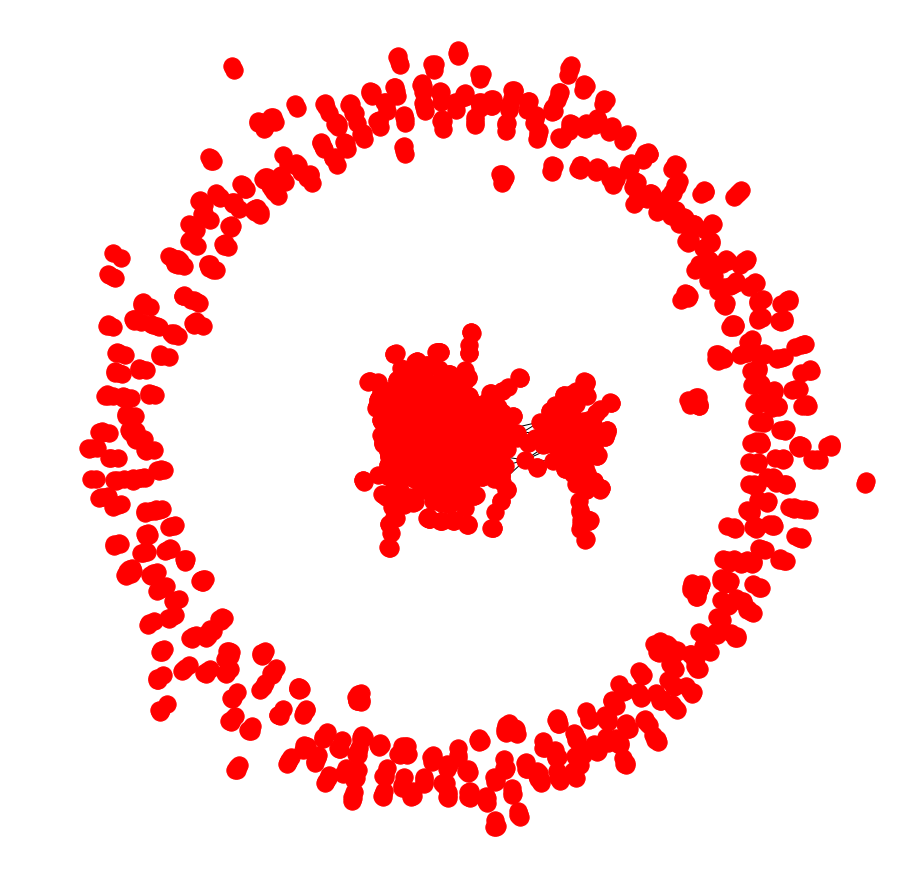

In [22]:
## Try Spring Layout (this will take a little bit of time)
pos = nx.spring_layout(nxG)
nx.draw(nxG, pos)

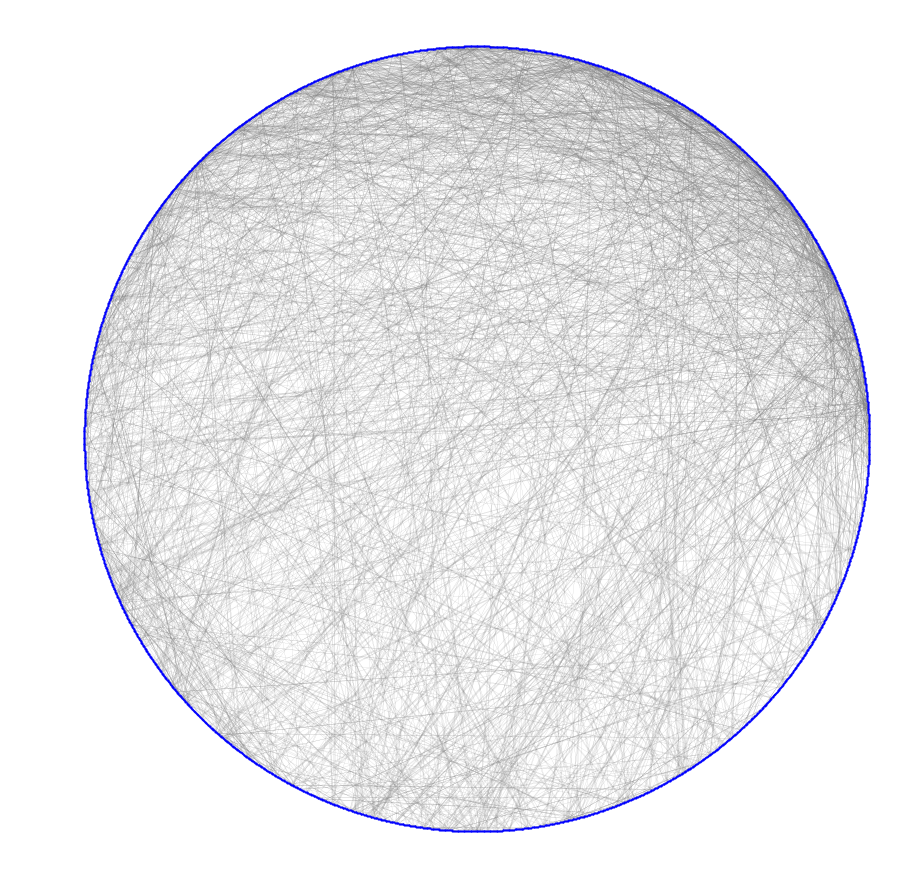

In [25]:
## Try Circular Layout (should be fast)
pos = nx.circular_layout(nxG)
nx.draw(nxG, pos, node_size=1, node_color='blue', width=0.1, edge_color='grey')

In [ ]:
## Try KK Layout (will take a long time so try this at home)
pos = nx.kamada_kawai_layout(nxG)
nx.draw(nxG, pos, node_size=1, node_color='blue', width=0.1, edge_color='grey')

# AP Network Graphs

In [26]:
def createNetwork(pyG, name):
    from pyvis import network as net
    #Network(, bgcolor="#222222", font_color="white")
    #pyG.from_nx(g)

    #neighbor_map = pyG.get_adj_list()
    #s = Series([len(x) for x in neighbor_map])
    from numpy import log1p, tanh
    #degrees      = g.degree()
    for node in pyG.nodes:
        #node["label"]  = name["id"]
        node["title"] = "{0}<br>".format(node['label'])
        #node["title"] += " Degree   :{0}<br>".format(degrees[node['id']])
        #node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
        #node["value"] = log1p(len(neighbor_map[node["id"]]))/10.0
        node["shape"] = "dot"
        node["mass"]  = node["size"]/10

#        ,
#          "color": {
#            "background": "rgba(108,247,252,1)",
#            "highlight": {
#              "border": "rgba(76,99,229,0.87)",
#              "background": "rgba(255,75,206,1)"
#            }
          
    pyG.show_buttons(filter_=['physics'])
    options = """var options = {
        "configure": {
            "enabled": true
        },
        "edges": {
            "color": {
                "inherit": true
            },
            "width": 0.2,
            "smooth": {
                "enabled": false,
                "type": "continuous"
            }
        },
        "interaction": {
            "dragNodes": true,
            "hideEdgesOnDrag": false,
            "hideNodesOnDrag": false
        },
        "physics": {
            "barnesHut": {
                  "gravitationalConstant": -23300,
                  "springConstant": 0.005
            },
            "maxVelocity": 37,
            "minVelocity": 0.75,
            "enabled": true,
            "stabilization": {
                "enabled": true,
                "fit": true,
                "iterations": 1000,
                "onlyDynamicEdges": false,
                "updateInterval": 50
            }
        }
    }"""
    pyG.set_options(options)
    pyG.show("{0}.html".format(name))
    print("Wrote {0}".format("{0}.html".format(name)))

# Build Network From One Actor To Another

In [27]:
source = "Kevin Bacon"
target = "Meryl Streep"

In [28]:
## Create networkx graph object
nxG = nx.Graph()

print("Full Network Size:   ",networkDF.shape)

## Limit network to movies that have at least one award and made in the last decade
#limNetworkDF = networkDF[(networkDF['Award'] < 10) & (networkDF["Year"] > 2010)].copy()
limNetworkDF = networkDF.copy()
print("Limited Network Size:",limNetworkDF.shape)
for movie, df in limNetworkDF.groupby('Key'):
    people  = df["Actor"].tolist()
    mapping = list(combinations(people, 2))
    nxG.add_edges_from(mapping, label=movie)
print("Number of Nodes: {0}".format(len(nxG.nodes())))
print("Number of Edges: {0}".format(len(nxG.edges())))

Full Network Size:    (132236, 5)
Limited Network Size: (132236, 5)
Number of Nodes: 11117
Number of Edges: 118956


In [48]:
## Maximum number of connections between source and target
cutoff = 4

In [49]:
nxGraph = nx.Graph()
pyG  = net.Network(height="850px", width="70%")
unique = {}



size_lookup   = {2: 50, 3: 30, 4: 15, 5: 10, 6: 5}
width_lookup  = {1: 20, 2: 10, 3: 5, 4: 1, 5: 0.5, 6: 0.25}
color_lookup  = {2: '#000000', 3: '#0066FF', 4: "#98FB98", 5: "#FFB6C1", 5: "#FFB6C1", 6: "#ADD8E6"}

node_attrs  = {source: {"Path": 2, "Color": color_lookup[2], "Size": size_lookup[2]},
               target: {"Path": 2, "Color": color_lookup[2], "Size": size_lookup[2]}}
edge_attrs  = {}



## The all_simple_paths function is the key here
for path in nx.all_simple_paths(nxG, source, target, cutoff=cutoff):
    #print(path)
    
    for i in range(len(path)-1):
        edge = (path[i],path[i+1])
        label = nxG[path[i]][path[i+1]]["label"]
        nxGraph.add_edge(edge[0], edge[1])
        
        for node in edge:
            if node_attrs.get(node) is not None:
                if len(path) >= node_attrs[node]["Path"]:
                    continue
            node_attrs[node] = {"Path": len(path), "Color": color_lookup[len(path)], "Size": size_lookup[len(path)]}
            #print("==>",len(path),node,node_attrs[node])
        
        if edge_attrs.get(edge) is not None:
            if len(path) >= edge_attrs[edge]["Path"]:
                continue
        #print(path)
        edge_attrs[edge] = {"Path": len(path), "Color": color_lookup[len(path)], "Label": label, "Width": width_lookup[len(path)-1]}
        #print("-->",len(path),edge,edge_attrs[edge])

nx.set_node_attributes(nxGraph, node_attrs)
nx.set_edge_attributes(nxGraph, edge_attrs)
if False:
    print("")
    for k,v in node_attrs.items():
        print(k,v)
#print(nxGraph.nodes(data=True))
print("Network of {0} and {1}".format(source, target))
print("Number of Nodes: {0}".format(len(nxGraph.nodes())))
print("Number of Edges: {0}".format(len(nxGraph.edges())))

Network of Kevin Bacon and Meryl Streep
Number of Nodes: 1659
Number of Edges: 9803


In [50]:
## Some useful values to keep the plots pretty
node_lookup = dict(zip(range(len(node_attrs)), node_attrs.keys()))
edge_lookup = dict(zip(node_attrs.keys(), range(len(node_attrs))))
node_size   = [x["Size"] for x in node_attrs.values()]
node_color  = [x["Color"] for x in node_attrs.values()]

print(len(node_lookup))
print(len(edge_lookup))
print(len(node_size))
print(len(node_color))

1659
1659
1659
1659


In [51]:
pyG  = net.Network(height="850px", width="70%")
pyG.add_nodes(nodes=range(len(node_lookup)), label=list(node_lookup.values()), size=node_size, color=node_color)
for edge in nxGraph.edges(data=True):
    pyG.add_edge(edge_lookup[edge[0]], edge_lookup[edge[1]], title=edge[2]["Label"], color=edge[2]["Color"], weight=edge[2]["Width"])

In [52]:
createNetwork(pyG, "_".join([source,target]))

Wrote Kevin Bacon_Meryl Streep.html
